

 # Advanced Data Processing - Supervised Techniques

 - Biel Cantera Potente



 ## 1. Choose a Dataset


 ### 1.1. Open-Source Dataset: Marriage Proposals

 #### Description
 This is a synthetic dataset on marriage proposals for anyone who wants to carry out a classification experiment.

 #### Features
 - Height: Represents the height of an individual in centimeters (from 150 to 180).
 - Age: Represents the age of an individual (from 20 to 80).
 - Income: Represents the monthly income of an individual (from 5,000 to 20,000 dollars).
 - RomanticGestureScore: Represents a score (from 0 to 10) related to romantic gestures.
 - CompatibilityScore: Represents a score (from 0 to 9) related to compatibility.
 - CommunicationScore: Represents a score (from 0 to 9) related to communication.
 - DistanceKM: Represents the distance (from 1 to 99) in kilometers.
 - AgeCategory: This is a derived feature from 'Age', categorized into groups like 'Young', 'Middle-aged', etc.
 - Response: Represents the response variable, indicating marriage proposal acceptance as 1 or marriage proposal rejection as 0.

 #### Link
 https://www.kaggle.com/datasets/anyasorc/marriage-proposal

 #### Collaborator
 Chigozie Anyasor


 ### 1.2. Appropriateness of the dataset
 The dataset is appropriate because we have two classes clearly labeled which allows us to perform classification, but it needs modifications. Specifically, the categorical variable "age category" must be converted into numerical observations. Additionally, null observations within this variable need to be removed to ensure data integrity.


 ### 1.3. Dataset Selection Justification
 We discussed and thought this was an good dataset for finding what makes an good marriage and the statistics behind it. And we see that the classes are clearly labeled so we are good to go perform classification. The dataset on marriage is selected because it offers insights into factors influencing marriage patterns, particularly related to male characteristics. Our interest lies in understanding whether specific attributes among men influence their likelihood of getting married. By analyzing variables such as age, income, romantic gesture score, compatibility score, communication score, distance, response, age category, and height, we aim to uncover any correlations or patterns that indicate certain types of men may have an easier time getting married.

 ### 1.4 Objectives of the project
 Identify Key Predictors:
 Determine which variables (e.g., income, age, romantic gesture score) are the most significant predictors of marriage likelihood among men.

 Analyze Relationships: Investigate correlations between different variables to understand how they interact and influence marriage outcomes.

  Develop Predictive Models: Build machine learning models to predict the likelihood of marriage based on the given variables, providing insights into future marriage trends.



 ## 2. Load, clean and validate the dataset.

In [42]:
# %%

# Import libraries
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import os

from io import StringIO
from IPython.display import Image
import matplotlib as mpl
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import svm
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [ ]:
# %%
os.getcwd()
df = pd.read_csv("data/marriage_proposal.csv")
df.sample(10)

Height  Age  Income  RomanticGestureScore  CompatibilityScore  \
1716     164   75   15907                     7                   4   
2608     173   76   18859                     3                   3   
8327     151   48    6403                     6                   5   
9851     151   51   11658                     3                   7   
7801     159   45   10024                     3                   0   
8883     156   35   15392                     2                   3   
1048     180   20   12120                     2                   7   
9274     167   60   19561                     1                   5   
6433     153   72   19388                     6                   0   
7292     154   54   11154                     3                   3   

      CommunicationScore  DistanceKM  Response  AgeCategory  
1716                   9          69         1       Senior  
2608                   6          86         1       Senior  
8327                   4          92         1  Middle-aged  
9851                   2          32         1       Senior  
7801                   4          18         1  Middle-aged  
8883                   6          86         0  Middle-aged  
1048                   1          43         1          NaN  
9274                   9          80         0       Senior  
6433                   5          30         1       Senior  
7292                   6          28         1       Senior


 #### 2.1. Understand the dataset

In [45]:
# %%

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Height                10000 non-null  int64 
 1   Age                   10000 non-null  int64 
 2   Income                10000 non-null  int64 
 3   RomanticGestureScore  10000 non-null  int64 
 4   CompatibilityScore    10000 non-null  int64 
 5   CommunicationScore    10000 non-null  int64 
 6   DistanceKM            10000 non-null  int64 
 7   Response              10000 non-null  int64 
 8   AgeCategory           9847 non-null   object
dtypes: int64(8), object(1)
memory usage: 703.2+ KB


In [46]:
# %%

df1 = df


 There are some nulls in age category so we will look at them.


 Now, lets look at the distribution of our independent variable.

In [47]:
# %%

result = df1.groupby('Response').agg(
    total_count=('Response', 'count'),  # Here, 'count' is a function
  
)
result.sort_values('Response')

total_count
Response             
0                4953
1                5047


 pretty 50% 50% between the count of the Response


 We also want to check if age and agecategory make sense between each other.

In [48]:
# %%

result = df.groupby('AgeCategory').agg(
    total_average = ('Age', 'mean'),  # Here, 'average' is a function
    max = ('Age', 'max'),
    min = ('Age', 'min'),
)
result.sort_values('AgeCategory')

total_average  max  min
AgeCategory                         
Middle-aged      40.320683   50   31
Senior           65.635350   80   51
Young            25.421184   30   21


 So the age is accurately put into the right categories; however there still isnt a large correlation between age and age category as we can now see below.


 #### 2.3. Basic Stadistics


 We will encode the categorical variables before doing the corr and other stats.



 #### 2.4. Erase empty values

In [49]:
# %%

null_age_rows = df[df['AgeCategory'].isnull()]
null_age_rows

Height  Age  Income  RomanticGestureScore  CompatibilityScore  \
105      163   20   12240                     5                   2   
234      172   20   10774                     5                   0   
272      161   20    8290                     8                   9   
298      155   20    9812                    10                   2   
389      157   20    6843                     9                   5   
...      ...  ...     ...                   ...                 ...   
9680     155   20    5175                     4                   5   
9729     175   20   12399                    10                   1   
9757     157   20   13973                     1                   9   
9850     172   20    9700                     7                   8   
9897     174   20   11561                     5                   7   

      CommunicationScore  DistanceKM  Response AgeCategory  
105                    0          56         0         NaN  
234                    7          32         0         NaN  
272                    0          35         0         NaN  
298                    5           6         1         NaN  
389                    6          41         0         NaN  
...                  ...         ...       ...         ...  
9680                   7          20         1         NaN  
9729                   9          46         0         NaN  
9757                   1          77         1         NaN  
9850                   8          79         0         NaN  
9897                   1          56         0         NaN  

[153 rows x 9 columns]


 Let's just remove the nulls.

In [50]:
# %%

df.dropna(subset=['AgeCategory'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9847 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Height                9847 non-null   int64 
 1   Age                   9847 non-null   int64 
 2   Income                9847 non-null   int64 
 3   RomanticGestureScore  9847 non-null   int64 
 4   CompatibilityScore    9847 non-null   int64 
 5   CommunicationScore    9847 non-null   int64 
 6   DistanceKM            9847 non-null   int64 
 7   Response              9847 non-null   int64 
 8   AgeCategory           9847 non-null   object
dtypes: int64(8), object(1)
memory usage: 769.3+ KB



 Now we the same column we need to encode it so we can use it in our model.

In [51]:
# %%

#dummies
def create_dummies(df):
    df_encoded = df.copy()
    for column in df.columns:
        if df[column].dtype == 'object':
            le = LabelEncoder()
            df_encoded[column] = le.fit_transform(df[column])
            print(f"Column: {column}")
            for original, encoded in zip(df[column], df_encoded[column]):
                print(f"Original: {original} -> Encoded: {encoded}")
    return df_encoded

df = create_dummies(df)
df.head(5)
df1 = df.astype('float64')
df1.sample(10)

Column: AgeCategory
Original: Senior -> Encoded: 1
Original: Middle-aged -> Encoded: 0
Original: Middle-aged -> Encoded: 0
Original: Senior -> Encoded: 1
Original: Middle-aged -> Encoded: 0
Original: Middle-aged -> Encoded: 0
Original: Senior -> Encoded: 1
Original: Young -> Encoded: 2
Original: Senior -> Encoded: 1
Original: Middle-aged -> Encoded: 0
Original: Middle-aged -> Encoded: 0
Original: Senior -> Encoded: 1
Original: Senior -> Encoded: 1
Original: Middle-aged -> Encoded: 0
Original: Senior -> Encoded: 1
Original: Middle-aged -> Encoded: 0
Original: Middle-aged -> Encoded: 0
Original: Senior -> Encoded: 1
Original: Senior -> Encoded: 1
Original: Senior -> Encoded: 1
Original: Middle-aged -> Encoded: 0
Original: Young -> Encoded: 2
Original: Middle-aged -> Encoded: 0
Original: Young -> Encoded: 2
Original: Senior -> Encoded: 1
Original: Senior -> Encoded: 1
Original: Senior -> Encoded: 1
Original: Middle-aged -> Encoded: 0
Original: Senior -> Encoded: 1
Original: Senior -> Enco

Height   Age   Income  RomanticGestureScore  CompatibilityScore  \
8226   152.0  37.0  17598.0                   4.0                 4.0   
5549   173.0  30.0  14325.0                   1.0                 1.0   
3936   174.0  75.0   5522.0                   4.0                 7.0   
9335   163.0  38.0  19909.0                   7.0                 4.0   
5667   179.0  24.0   6151.0                   0.0                 9.0   
6810   161.0  27.0  16683.0                   0.0                 5.0   
1616   155.0  39.0  19577.0                  10.0                 1.0   
8248   169.0  55.0  10439.0                   2.0                 7.0   
3219   167.0  23.0  10166.0                   3.0                 6.0   
3338   163.0  39.0   7951.0                   0.0                 2.0   

      CommunicationScore  DistanceKM  Response  AgeCategory  
8226                 0.0        69.0       1.0          0.0  
5549                 6.0        71.0       0.0          2.0  
3936                 5.0        98.0       0.0          1.0  
9335                 6.0        19.0       1.0          0.0  
5667                 7.0        38.0       1.0          2.0  
6810                 2.0        22.0       1.0          2.0  
1616                 3.0        96.0       0.0          0.0  
8248                 2.0        21.0       0.0          1.0  
3219                 9.0         9.0       1.0          2.0  
3338                 9.0        89.0       1.0          0.0

Quantitative Variables: Index(['Height', 'Age', 'Income', 'RomanticGestureScore', 'CompatibilityScore',
       'CommunicationScore', 'DistanceKM', 'Response', 'AgeCategory'],
      dtype='object')
                        Height       Age    Income  RomanticGestureScore  \
Height                1.000000  0.003536 -0.013036             -0.001862   
Age                   0.003536  1.000000 -0.001336             -0.003067   
Income               -0.013036 -0.001336  1.000000             -0.005075   
RomanticGestureScore -0.001862 -0.003067 -0.005075              1.000000   
CompatibilityScore    0.002813  0.007250 -0.008378             -0.006186   
CommunicationScore    0.011192 -0.007958 -0.001002             -0.011711   
DistanceKM           -0.003980 -0.004200  0.007772              0.000026   
Response              0.003975  0.015358  0.006627              0.014969   
AgeCategory           0.014731 -0.050452  0.001032             -0.009449   

                      CompatibilityScore  

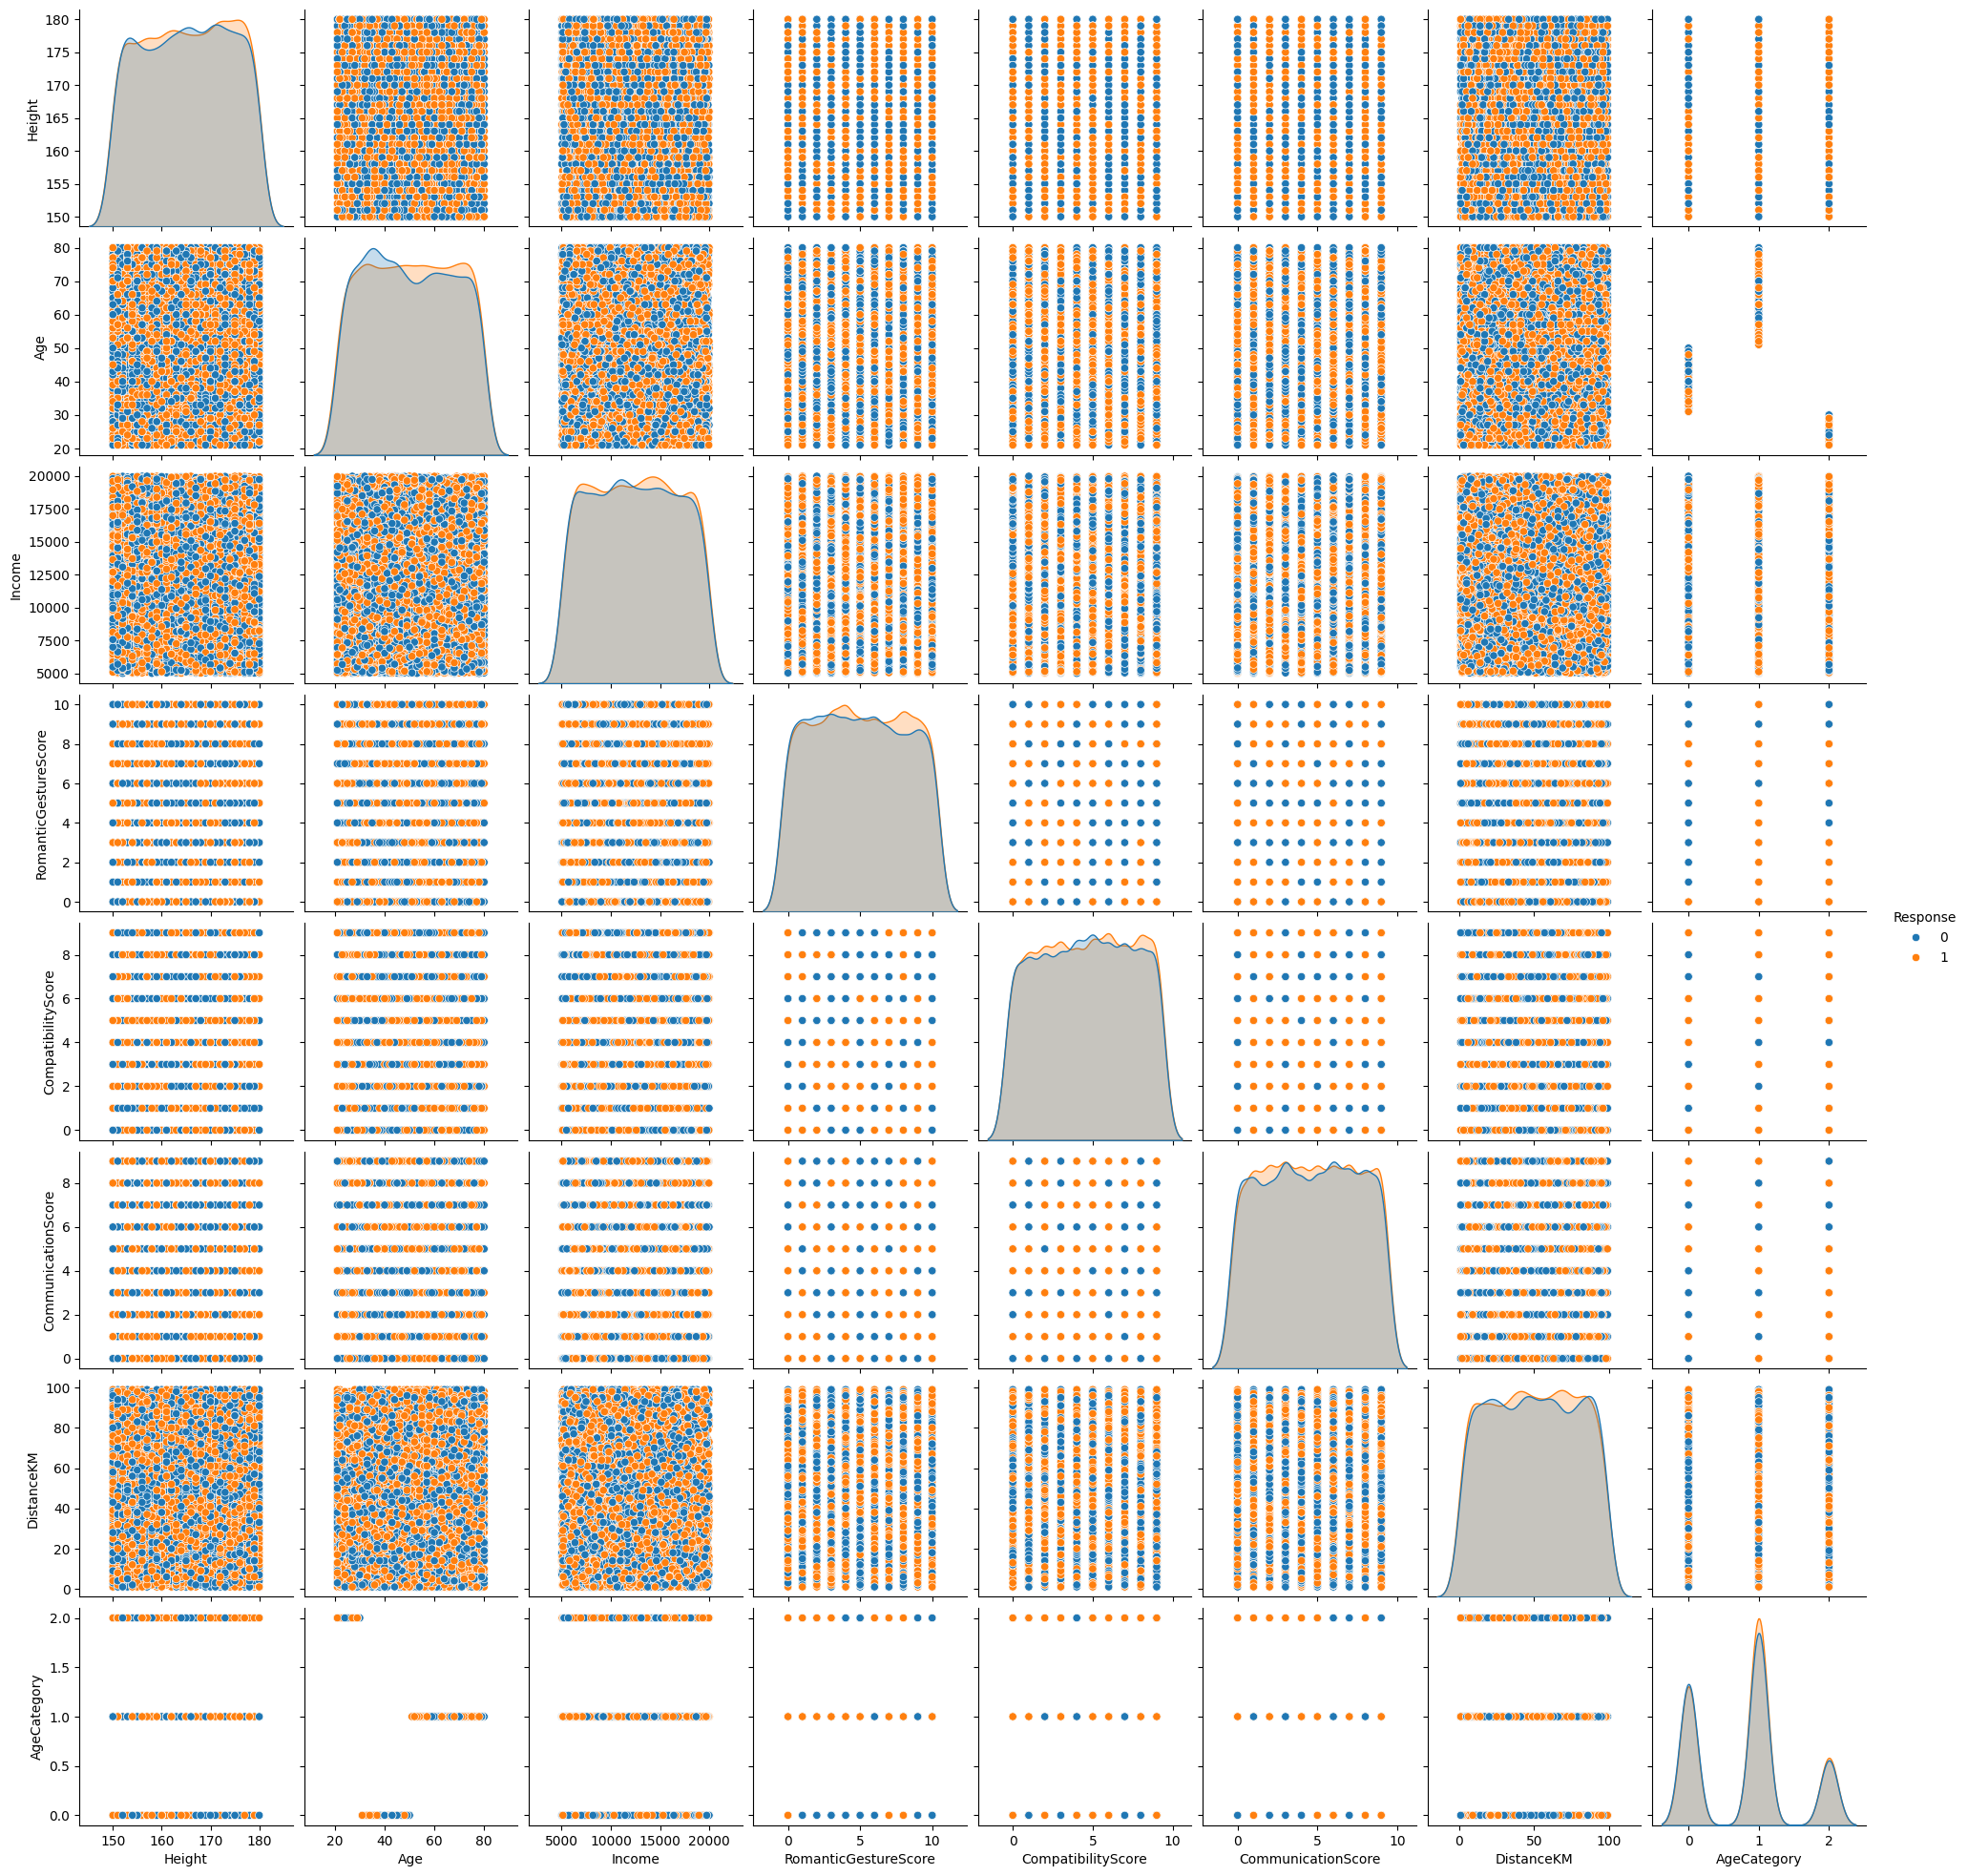

In [52]:
# %%

target = 'Response'
features_num = df.select_dtypes('int64', 'float').columns
num_col = df.select_dtypes(include=['int64', 'float64']).columns
print("Quantitative Variables:", num_col)
print(df[num_col].corr())
sns.pairplot(df, hue=target)



 # We can extract from this



 with the encoder we can still see what the values are in the end (0-2)

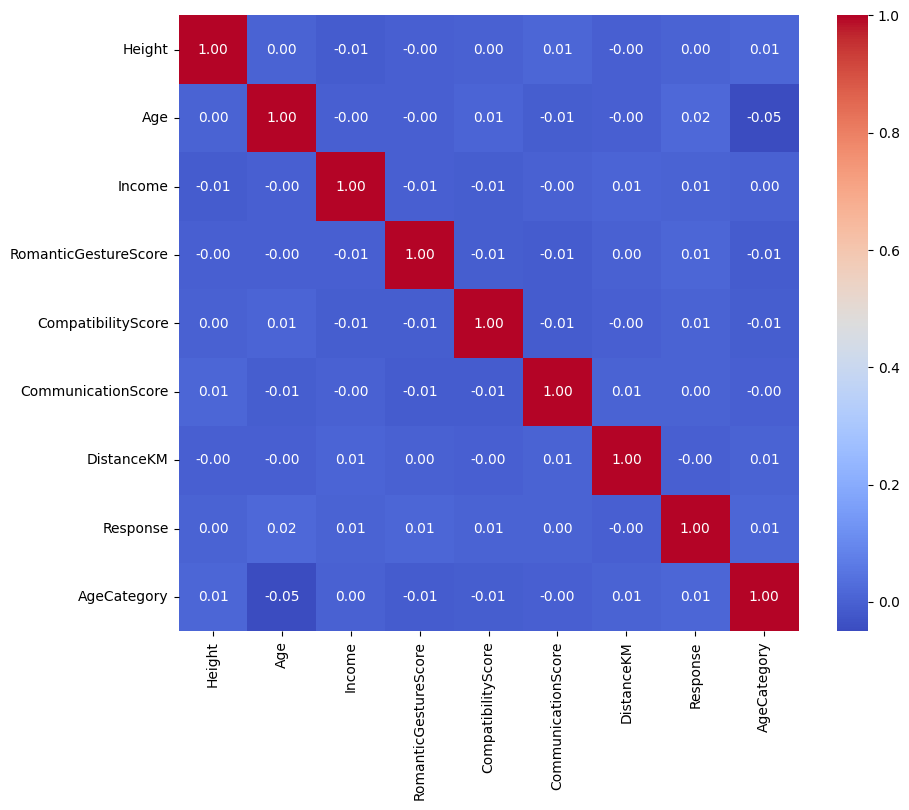

In [53]:
# %%

df1corr = df1
df1corr.corr()

corr_matrix = df1corr.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


 for purposes of visualizing two of our variables with the color being the Response, we will visualize a trend or our data.

In [54]:
# %%

df_group = df1['Response']

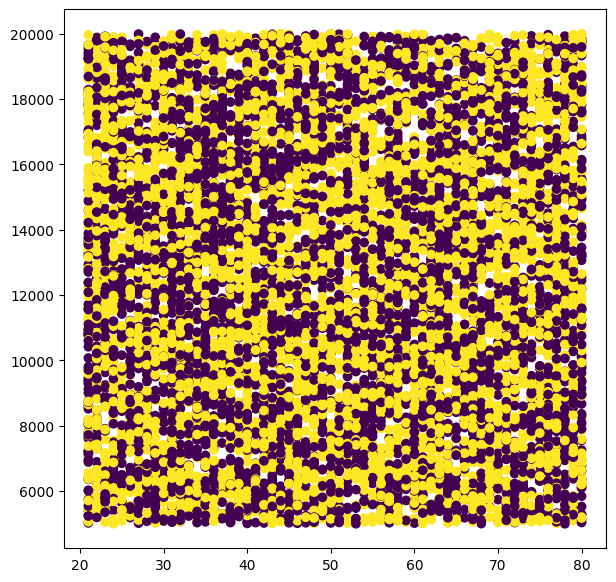

In [55]:
# %%

# Create a dataframe df_pd
df_pd = pd.DataFrame({'x': df1['Age'], 'y': df1['Income'], 'group': df_group})

# Max and min values for 'x' and 'y'.
x_min, x_max = df_pd['x'].min()-0.1, df_pd['x'].max()+0.1
y_min, y_max = df_pd['y'].min()-0.1, df_pd['y'].max()+0.1

def plot_decision_boundaries(x, y, labels, model,
                             x_min=x_min,
                             x_max=x_max,
                             y_min=y_min,
                             y_max=y_max,
                             grid_step=0.02):

    xx, yy = np.meshgrid(np.arange(x_min, x_max, grid_step),
                         np.arange(y_min, y_max, grid_step))

    # Predict meshgrid values.
    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]

    # Reshape
    Z = Z.reshape(xx.shape)

    # Colors.
    arr = plt.cm.coolwarm(np.arange(plt.cm.coolwarm.N))
    arr_hsv = mpl.colors.rgb_to_hsv(arr[:,0:3])
    arr_hsv[:,2] = arr_hsv[:,2] * 1.5
    arr_hsv[:,1] = arr_hsv[:,1] * .5
    arr_hsv = np.clip(arr_hsv, 0, 1)
    arr[:,0:3] = mpl.colors.hsv_to_rgb(arr_hsv)
    my_cmap = ListedColormap(arr)

    # Decision boundaries.
    fig, ax = plt.subplots(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=my_cmap, shading='auto')

    # Add samples.
    ax.scatter(x, y, c=labels, cmap='coolwarm')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.grid(False)

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(df_pd['x'], df_pd['y'], c=df_group)



 This just shows the randomness of age to income and whether they got married or not. There isnt really a trend here. It's pretty randomized which mean we may not get great results from our models


 ### 3. Separate training and test


 #### 3.1 & 3.2

In [56]:
# %%

# Split train - testt
X = df1.drop(['Response'],axis=1)
Y = df1['Response']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, train_size=0.8)



 The percentage that is going to represent training and test datasets
 separately is 80%. Becausee it follows the normal separation percentage.


 #### 3.3

 In situations requiring fine-tuning of hyperparameters or comparing multiple models:

 Training Set: Used for model training.
 Validation Set: Used to evaluate model performance during hyperparameter tuning or model selection.
 Test Set: Reserved to evaluate the final model's performance after training and tuning steps are complete.
 This approach ensures a fair evaluation of the model's generalization performance and prevents overfitting to the test set.


 Now lets set the neighbors and params and build the model.



 ### 4. K-nn Method



 #### 4.1. Optimal k and weight values

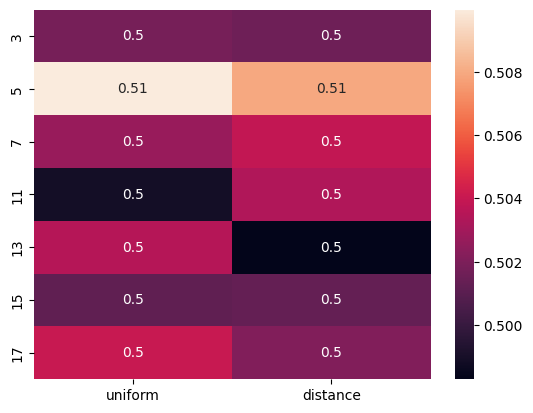

In [57]:
# %%

# K value
knn_neighbors = [3,5,7,11,13,15,17]
knn_weights = ['uniform', 'distance']
param = [{'n_neighbors': knn_neighbors,
         'weights': knn_weights}]

# Find best values
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn_gridSearch = GridSearchCV(KNeighborsClassifier(),
                              param_grid = param,
                              scoring='accuracy',
                              cv=4)

knn_gridSearch.fit(x_train, y_train)
model_result = knn_gridSearch.cv_results_['mean_test_score'].\
reshape(len(knn_neighbors),len(knn_weights))

import seaborn as sns
sns.heatmap(model_result, annot = True, xticklabels = knn_weights, yticklabels = knn_neighbors)
plt.show()

In [58]:
# %%

best_param = knn_gridSearch.best_params_
print(best_param)

{'n_neighbors': 5, 'weights': 'uniform'}



 3 is the best param

In [59]:
# %%

knn_bestparam = KNeighborsClassifier(n_neighbors=best_param['n_neighbors'], weights=best_param['weights']).fit(x_train, y_train)



 #### 4.3. Train the model

In [60]:
# %%

# Predict
predict = knn_bestparam.predict(x_test)
cm = confusion_matrix(y_test, predict)

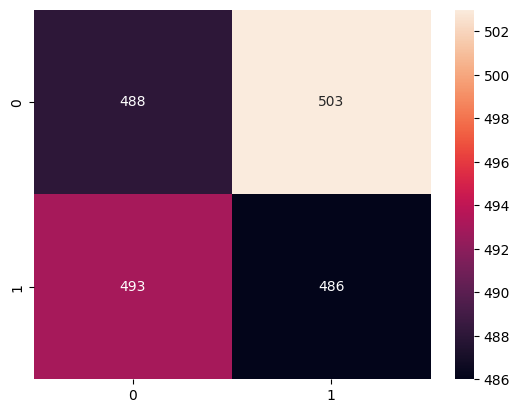

In [61]:
# %%

# Results
sns.heatmap(cm, annot=True, fmt='g')
plt.show()



 Maybe not what we were wanting, but it was a little expected to get these kind of numbers.



 Lets look at the metrics



 #### 4.4. Model Evaluation

In [62]:
# %%

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn import metrics

In [63]:
# %%

tn, fp, fn, tp = cm.ravel()
fpr = fp/(fp+tp)
print("False positives rate:", fpr)

#Accuracy
accu = metrics.accuracy_score(y_test, predict)
print("Accuracy", accu)
# Precision
prec = metrics.precision_score(y_test, predict)
#Of all the instances the model identified as positive, how many were actually relevant?
print("Precision:", prec)
# Recall
rec = metrics.recall_score(y_test, predict)
print("recal:", rec)

False positives rate: 0.5085945399393327
Accuracy 0.49441624365482234
Precision: 0.4914054600606673
recal: 0.4964249233912155




 These are trash metrics we got. everything is around 50% meaning we have a 50/50 of choosing if the person is rejected or accepted which is jsut as good as guessing. If these metrics are correct then it shows all types of men can have their partner say yes or get rejected. There's hope for all mankind.



 ### 5. SVM Method



 #### 5.1. Optimal C and Gamma Values

<Axes: >

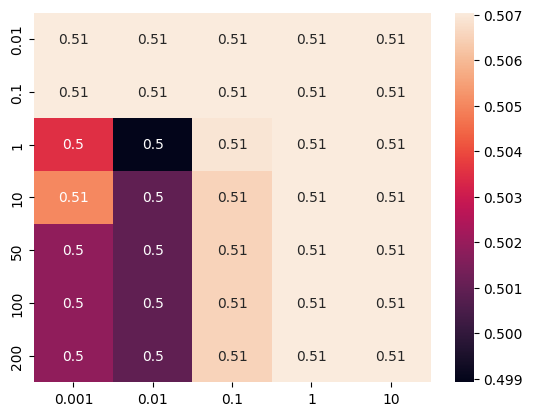

In [64]:
# %%

c_values = [0.01, 0.1, 1, 10, 50, 100, 200]
gamma_values = [0.001, 0.01, 0.1, 1, 10]
param =[{'C': c_values,
        'gamma': gamma_values}]

svm_gridSearch = GridSearchCV(
    svm.SVC(kernel='rbf'), # model
    param_grid = param,
    scoring= 'accuracy',
    cv =4
)

svm_gridSearch.fit(x_train, y_train)
model_result = svm_gridSearch.cv_results_['mean_test_score'].\
reshape(len(c_values),len(gamma_values))
sns.heatmap(model_result, annot=True, xticklabels = gamma_values, yticklabels = c_values)

In [65]:
# %%

best_param = svm_gridSearch.best_params_
print(best_param)

{'C': 0.01, 'gamma': 0.001}



 #### 5.3. Train the model

In [66]:
# %%

svm_bestparam = svm.SVC(C=best_param['C'],
                        gamma=best_param['gamma'],
                        kernel = 'rbf',
                        probability = True).\
fit(x_train, y_train)

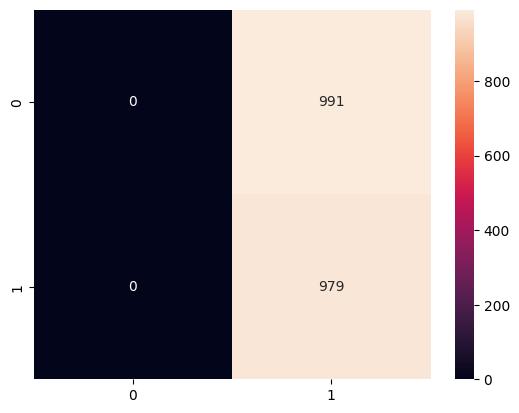

In [67]:
# %%

# Prediction
predict = svm_bestparam.predict(x_test)
cm = confusion_matrix(y_test, predict)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()


 #### 5.4. Model Evaluation

In [68]:
# %%

def evaluate_model(model, x_test, y_test):
    print("Inside evaluate_model function")  # Add this line
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    # Print and comment the results
    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", confusion_mat)
    print("Classification Report:\n", classification_rep)


 #### 5.5. Represent ROC and calculate AUC value

In [69]:
# %%

def roc_and_auc(model, x_test, y_test):
    y_pred_proba = model.predict_proba(x_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc_score = auc(fpr, tpr)
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
    return auc_score



 ### 6. Conclusions

 #### 6.1. Best method
 We assume that the best model to use in this case is the SVM as the K-nn gives a prediction of 50% and that would be the typical prediction of a random guy when asking his girlfriend to marry him

 #### 6.2. Other methods
 #### 
 6.2.1. Which age group tends to have the highest marriage rates among men?

In [70]:
age_group_marriage_rates = df.groupby('Age')['Response'].mean().sort_values(ascending=False)
print("Marriage rates by age group:\n", age_group_marriage_rates)


Marriage rates by age group:
 Age
74    0.633333
70    0.602564
79    0.582278
40    0.574074
55    0.568750
50    0.562874
66    0.553459
22    0.548780
56    0.548193
48    0.544379
23    0.537500
52    0.533708
69    0.531250
61    0.528736
53    0.528571
30    0.525180
33    0.524096
21    0.523256
39    0.523179
63    0.522472
58    0.522222
32    0.519608
62    0.519231
34    0.518293
28    0.518293
77    0.517857
67    0.513369
46    0.512821
64    0.509554
24    0.509317
51    0.503546
59    0.503497
29    0.502994
76    0.502762
45    0.502703
49    0.500000
41    0.500000
54    0.500000
72    0.500000
71    0.496970
80    0.493976
44    0.487179
38    0.482558
75    0.477707
26    0.475000
73    0.468571
47    0.467456
57    0.466667
43    0.462857
27    0.459627
36    0.459459
60    0.452229
25    0.452229
68    0.451613
78    0.451220
42    0.448276
31    0.445783
65    0.445255
35    0.412371
37    0.405882
Name: Response, dtype: float64


2. How does income level correlate with marriage likelihood among men?

In [71]:
income_correlation = df['Income'].corr(df['Response'])
print("Correlation between income level and marriage likelihood:", income_correlation)

Correlation between income level and marriage likelihood: 0.006626715816234862


3. Is there a noticeable difference in marriage rates between people who live far to close?

In [72]:
distance_marriage_rates = df.groupby('DistanceKM')['Response'].mean()
print("Marriage rates by distance:\n", distance_marriage_rates)

Marriage rates by distance:
 DistanceKM
1     0.520408
2     0.512000
3     0.500000
4     0.468085
5     0.561983
        ...   
95    0.392523
96    0.564356
97    0.544444
98    0.488889
99    0.534091
Name: Response, Length: 99, dtype: float64


4. Do men who score higher in romantic gestures tend to get married more frequently?

In [73]:
romantic_score_correlation = df['RomanticGestureScore'].corr(df['Response'])
print("Correlation between romantic gesture score and marriage likelihood:", romantic_score_correlation)

Correlation between romantic gesture score and marriage likelihood: 0.014969400234410358


5. Are there any noticeable trends in marriage rates among men based on height categories?

In [74]:
# Assuming height is already categorized. If not, you might need to categorize it similarly to 'distance_category'.
height_marriage_rates = df.groupby('Height')['Response'].mean().sort_values(ascending=False)
print("Marriage rates by height category:\n", height_marriage_rates)

Marriage rates by height category:
 Height
172    0.560563
176    0.549020
157    0.542683
174    0.536585
177    0.536443
179    0.527607
167    0.523333
160    0.518395
155    0.518395
161    0.517350
158    0.515464
150    0.514950
152    0.510972
162    0.507289
156    0.507143
169    0.506452
164    0.504298
163    0.501695
151    0.500000
168    0.500000
180    0.498233
165    0.496575
153    0.495238
170    0.493750
159    0.493243
175    0.484419
178    0.474320
173    0.470779
171    0.459155
166    0.450276
154    0.446602
Name: Response, dtype: float64
